<a href="https://colab.research.google.com/github/pathstream-curriculum/Statistics/blob/master/Rideshare_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rideshare Project 
<img src="https://data.cityofchicago.org/api/assets/73F1665C-0FE6-4183-8AD1-E91DB8EFAFA4?7CB02402-8E06-48B0-8C9A-3890182D58C7.png" width=400 alt="Drawing" style="width: 200px;"/>

The city of Chicago has recently published a dataset containing detailed information about all rides taken with rideshare providers like Uber and Lyft in Chicago and surrounding areas From November 2018 through March 2019. The city of Chicago has hired you as an analyst to dive into the data, derive insights, and provide transparency to drivers, riders, and the general public about  everything there is to know about rideshare usage in the city. 

The data set you'll be investigating in this notebook comprises two weeks worth of data downsampled by a factor of 500 (meaning we extracted just 1 out of every 500 records in the database for this two week time period). This downsampling, as well as the restriction to just two weeks of data, means you're working with just a small fraction (~15k records) of the entire data set published, but the work you do here could easily be applied to the full database of ~45 million records!

*Note: Some columns of unnessary or redundant information have been removed from the original data set and columns for Year, Month, Weekday and Hour of Day have been added for convenience. The published data has been anonymized by rounding off dollar amounts and times of day. To make the data more realistic looking we have added random noise to the Fare, Tip, Latitude and Longitude columns.*

## Part 1: Data Preparation and Summary Statistics

### Step 1: Investigate the source of your data 
As always, a great first step before you jump into your analysis is to check out the source of your data. You can find out more about this exciting dataset [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data).

### Step 2: Download and read in the data
Since you are working in a cloud-based Google Colab notebook, you first you need to retrieve your data set from a GitHub repository. You can do this by running the following cell. Any time you leave this notebook and come back after a significant amount you will need to start with this step again.

---

The following code in plain English:

1. Remove the `Data-C4` directory if it already exists
2. Retrieve the data set for this project from a GitHub repository

In [1]:
# 1. Remove the data directory if it already exists
!rm -rf Data-C4
# 2. Retrieve the dataset for this project from a GitHub repository
!git clone https://github.com/ryan-keenan/Data-C4

Cloning into 'Data-C4'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 158 (delta 0), reused 0 (delta 0), pack-reused 155
Receiving objects: 100% (158/158), 38.87 MiB | 23.68 MiB/s, done.
Resolving deltas: 100% (61/61), done.


Next, you need to import some Python libraries to read and work with the data. Run the following cell to perform these imports.

In [0]:
# Import the pandas library for reading and manipulating your data
# Anywhere you see "pd" in this notebook it's a reference to the pandas library
import pandas as pd
# Extra step to ensure that pandas plays nice with matplotlib
pd.plotting.register_matplotlib_converters()
# Import the numpy library for running calculations on your data
# Anywhere you see "np" in this notebook it's a reference to the numpy library
import numpy as np
# Import some components of the matplotlib library for plotting your data
# Anywhere you see "plt" or "mpimg" in this notebook it's a reference to the "pyplot" and "image" packages from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import seaborn library for making your plots pretty!
# Anywhere you see "sns" in this notebook it's a reference to the seaborn library
import seaborn as sns
# Set some default plotting parameters using seaborn
sns.set()


Run the following cell to use the `pandas` library to read the csv file containing your data. In the code below, `df` is short for dataframe. Throughout this project, whenever you see `df`, it's a reference to the data set, which is contained in a `pandas` dataframe.

In [0]:
# Read the data into a dataframe called "df".
df = pd.read_csv('Data-C4/rideshare_holidays.csv', parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

### Step 3. Inspect your dataset
Run the following cell to look at the column names and first few rows of your data. Be sure to scroll to the right to see all the columns. 

In [4]:
# Print the column names and first five rows of the dataset contained in df
# Note: to look at more than 5 rows just enter a number in the parentheses e.g., "df.head(10)"
df.head()

,Trip Start Timestamp,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Weekday,Hour of Day
0,2018-12-21 00:15:00,205df3934c192419191fee0cd59d937e428ce943,2018-12-21 00:15:00,179.0,0.8,6.0,6.0,3.355505,0.0,2.5,5.855505,False,1,41.943193,-87.652933,41.934605,-87.647185,2018,12,Friday,0
1,2018-12-21 00:15:00,21e57f6045a88120fb44ed6e5f3ef3056ec49397,2018-12-21 00:15:00,405.0,0.8,8.0,8.0,5.372322,0.0,2.5,7.872322,False,1,41.893997,-87.619736,41.892972,-87.612612,2018,12,Friday,0
2,2018-12-21 00:15:00,571289f1acbfc37f0f6cc7374521b6925a68fe17,2018-12-21 00:30:00,312.0,0.9,8.0,32.0,12.564570,0.0,3.8,16.364570,False,1,41.892318,-87.632273,41.877202,-87.620371,2018,12,Friday,0
3,2018-12-21 00:15:00,32a2fc1023c5fed0cb7170783b6d5ef62bfa2803,2018-12-21 00:30:00,373.0,1.4,6.0,5.0,5.293349,0.0,3.0,8.293349,False,1,41.945562,-87.654244,41.951144,-87.684893,2018,12,Friday,0
4,2018-12-21 00:15:00,71545f540b6681e7f7ecf2b1ac6c96c1c2d12f92,2018-12-21 00:45:00,1165.0,5.2,8.0,6.0,8.312059,0.0,4.0,12.312059,True,3,41.908317,-87.635508,41.956913,-87.666823,2018,12,Friday,0


Run the next cell to look at the last few rows of your data. 

In [5]:
# Print the column names and last five rows of the dataset contained in df
# Note: to look at more than 5 rows just enter a number in the parentheses e.g., "df.tail(10)"
df.tail()

,Trip Start Timestamp,Trip ID,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Weekday,Hour of Day
6567,2019-01-03 23:30:00,89b485be6ec6c78b993b1645b7fb49999da492a4,2019-01-04 00:00:00,1980.0,16.2,71.0,NaN,28.562773,0.0,3.05,31.612773,False,1,41.744878,-87.656952,NaN,NaN,2019,1,Thursday,23
6568,2019-01-03 23:30:00,9492b0fabc13f44933a97405192630401c8c3637,2019-01-04 00:00:00,1371.0,6.9,24.0,19.0,5.061094,0.0,2.55,7.611094,True,3,41.901516,-87.676215,41.925253,-87.765639,2019,1,Thursday,23
6569,2019-01-03 23:45:00,c7cef2424a066355319a4d989dde835fbc5c4546,2019-01-03 23:45:00,483.0,3.5,21.0,22.0,8.831835,0.0,2.55,11.381835,False,1,41.933578,-87.713131,41.918441,-87.671269,2019,1,Thursday,23
6570,2019-01-03 23:45:00,4bc0d2e5e0dd1592a9b6a4f06aaa77976942b5e7,2019-01-04 00:00:00,685.0,6.5,32.0,41.0,10.950316,0.0,3.05,14.000316,False,1,41.876936,-87.623295,41.798245,-87.580372,2019,1,Thursday,23
6571,2019-01-03 23:45:00,cabb691bc3b9aa7ca48bdfcafbf36e2fb4aaff99,2019-01-04 00:00:00,513.0,2.4,7.0,6.0,5.790258,0.0,3.05,8.840258,False,1,41.921733,-87.646511,41.945588,-87.659242,2019,1,Thursday,23


### Answer the following questions after looking at the data:
You can explore the [city of Chicago website for this dataset](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data) further to learn more about each column.

1. What timeframe (range of dates/times) does this data set cover?

2. Which columns look like the most interesting ones to explore?

3. Are there any columns that don't look particularly useful?

4. Is there missing data in any of the columns?

5. Any columns that you're not sure about?

### Step 4. Explore the column data types and presence of null values

In the cell below, running `df.info()` prints out each column name along with the total number of non-null values in that column and its data type. Investigate the output and see what you find!

In [7]:
# Print information about the total number of non-null values and data types in each column of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 21 columns):
Trip Start Timestamp          6572 non-null datetime64[ns]
Trip ID                       6572 non-null object
Trip End Timestamp            6572 non-null datetime64[ns]
Trip Seconds                  6572 non-null float64
Trip Miles                    6572 non-null float64
Pickup Community Area         6137 non-null float64
Dropoff Community Area        6094 non-null float64
Fare                          6572 non-null float64
Tip                           6572 non-null float64
Additional Charges            6572 non-null float64
Trip Total                    6572 non-null float64
Shared Trip Authorized        6572 non-null bool
Trips Pooled                  6572 non-null int64
Pickup Centroid Latitude      6143 non-null float64
Pickup Centroid Longitude     6143 non-null float64
Dropoff Centroid Latitude     6098 non-null float64
Dropoff Centroid Longitude    6098 non-null float64
Y

### Questions:
The output of `df.info()` is a table containing the column names, number of non-null elements and data type. Above the printed table `RangeIndex:` indicates the total number of rows in the table.
1. What is the shape of this data set in terms of (# of rows, # of columns)? 
2. How many columns contain null values?
3. In the output of `df.info()` above, you'll see that the different data types are listed as things like "datetime64", "bool" and "float64"... what do these names actually mean? In other words, what does it mean to be an "int64" vs. a "bool" vs. something else?
4. How many different data types are there? 
  

### Step 5. Eliminate Null Values 
 If there are null values in your data, you will often want to eliminate their rows from the data set, or change them to an acceptable value. In some cases, null values may be interesting to explore further, but for this project, you're just going to remove them as a way of cleaning up your dataset.
 
 Run the following cell to drop all rows containing null values.

In [0]:
# Remove all rows containing null values
df.dropna(how='any', axis=0, inplace=True) 

Now you can run `df.info()` again to confirm that you have the same number of non-null values in all columns of your dataset.

In [8]:
# Print information about the total number of non-null values and data types in each column of your dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 21 columns):
Trip Start Timestamp          6572 non-null datetime64[ns]
Trip ID                       6572 non-null object
Trip End Timestamp            6572 non-null datetime64[ns]
Trip Seconds                  6572 non-null float64
Trip Miles                    6572 non-null float64
Pickup Community Area         6137 non-null float64
Dropoff Community Area        6094 non-null float64
Fare                          6572 non-null float64
Tip                           6572 non-null float64
Additional Charges            6572 non-null float64
Trip Total                    6572 non-null float64
Shared Trip Authorized        6572 non-null bool
Trips Pooled                  6572 non-null int64
Pickup Centroid Latitude      6143 non-null float64
Pickup Centroid Longitude     6143 non-null float64
Dropoff Centroid Latitude     6098 non-null float64
Dropoff Centroid Longitude    6098 non-null float64
Y

### Question
1. How many rows are you left with?

### Step 6. Investigate summary statistics for your dataset

Run the cell below to compute and display summary statistics for your dataset. The output will be a table containing the count, mean, standard deviation, min, max and 25%, 50% (median) and 75% quartiles for all columns. 

In [9]:
# Print out summary statistics for all columns
df.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,6572.000000,6572.000000,6137.000000,6094.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6143.000000,6143.000000,6098.000000,6098.000000,6572.000000,6572.000000,6572.000000
mean,984.649726,6.041464,25.078051,25.864621,11.527415,0.623478,3.080157,15.231050,1.274194,41.891893,-87.666306,41.893166,-87.668781,2018.225198,9.522824,13.295648
std,661.072357,6.551493,20.224738,20.680509,8.901855,1.704084,1.858867,10.499637,0.674322,0.063000,0.057941,0.062589,0.063210,0.417744,4.595187,6.608478
min,67.000000,0.000000,1.000000,1.000000,0.019438,0.000000,0.000000,0.700983,1.000000,41.649067,-87.915590,41.649354,-87.915528,2018.000000,1.000000,0.000000
25%,505.750000,1.800000,8.000000,8.000000,5.883585,0.000000,2.500000,8.764584,1.000000,41.875980,-87.683859,41.877700,-87.684682,2018.000000,12.000000,9.000000
50%,818.000000,3.700000,24.000000,24.000000,8.603869,0.000000,3.000000,11.989529,1.000000,41.897210,-87.653495,41.897027,-87.652287,2018.000000,12.000000,14.000000
75%,1300.000000,7.500000,32.000000,32.000000,13.411816,0.000000,3.050000,17.409890,1.000000,41.930616,-87.631441,41.933172,-87.631603,2018.000000,12.000000,19.000000
max,6472.000000,83.500000,77.000000,77.000000,121.016974,30.500000,15.300000,123.816974,6.000000,42.022373,-87.534121,42.020109,-87.533848,2019.000000,12.000000,23.000000


### Answer these questions based on summary statistics
The table you printed using `df.describe()` is full of interesting information! Answer the following questions based on the summary statistics presented in the table.
1. What is the median tip given for rides?
2. What is the longest distance ride taken?
3. What is the average trip time in minutes?
4. What was the most expensive ride?
5. Are there more rides in the AM or PM hours of the day?

## Part 2: Visualizing Data
<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/datavis_example.png" width=400 alt="Drawing" style="width: 200px;"/>


### Step 7: Display 5-number summary as a box plot
Using `df.describe()` above, you printed out the summary statistics for each column. Often times it can be really helpful to look at summary statistics graphically, and for that you'll use a box plot, where you can easily see the range, quartiles and any outliers in your data.

When you run the next cell, you'll generate a boxplot using the [seaborn `boxplot()` routine](https://seaborn.pydata.org/generated/seaborn.boxplot.html) where the area shaded in blue shows the interquartile range (IQR), with vertical lines showing the 25%, 50%(median), and 75% quartiles. 

The vertical lines outside the shaded box show +/- 1.5\*IQR, which is the default range used to identify outliers. The individual datapoints show those identified as outliers. 

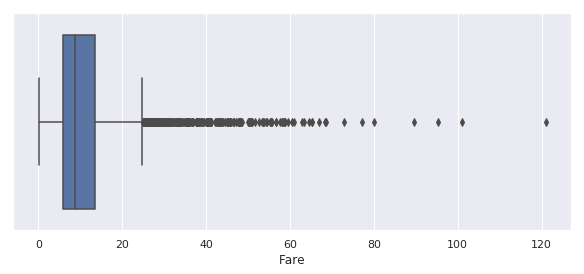

In [10]:
# Set the figure size for large display
plt.figure(figsize=(10,4))
# Display Fare histogram
sns.boxplot(df['Fare'])
plt.show()

In the figure you generated above, the area shaded in blue shows the interquartile range (IQR), with vertical lines showing the 25%, 50%(median), and 75% quartiles. The vertical lines outside the shaded box show +/- 1.5\*IQR, which is the default range used to identify outliers. The individual datapoints plotted as diamonds show those identified as outliers.

### Exercise + Questions:
1. Refer back to the table you printed out using `df.describe()` above and verify that the 25%, 50%(median), and 75% quartiles for the "Fare" column agree with the plot you generated running the previous cell.
2. In this case, what values are considered "outliers" for the "Fare" column?
3. In the code cell above, where it says `sns.boxplot(df['Fare'])`, change "Fare" to "Trip Miles" and run the cell again. (Note: the column name you put in this line of code has to match exactly with what's in the data, i.e., none of the following will work: "trip miles", "TripMiles" or "TRIP MILES")
4. Run the code again changing the column name to "Tip". What do you find?

### Step 8: Plot a column of data as a histogram
Another useful way to visualize a column of data is using a histogram. In this case, you'll be using the [seaborn `distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html) routine to generate bins across the entire range of your data and count the number of data points that fall into each bin. 

Run the cell below to look at the "Fare" column in histogram form.

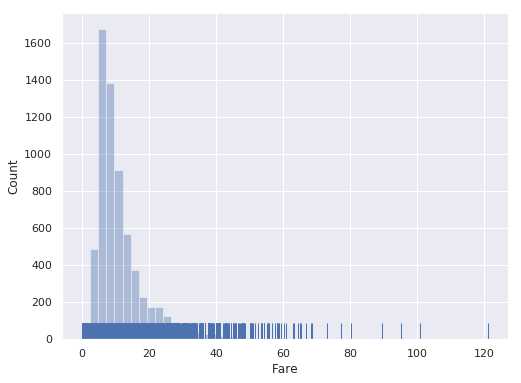

In [12]:
# Set the figure size for large display
plt.figure(figsize=(8,6))
# Display Fare histogram. 
# The "kde=False flag indicates you don't want to plot a line over the histogram (set kde=True to see what happens!)
# The "rug=True" flag indicates you want to put a tick mark along the x-axis for each datapoint (set rug=False to see what happens!)
sns.distplot(df['Fare'], 
             kde=False, 
             rug=True)
# Add a label to the vertical axis
plt.ylabel('Count')
plt.show()

### Exercise + Questions:
1. It might look like there are no histogram bars on the right-hand side of the graph but the fact is they're there, just small! The tick marks along the x-axis show each of the data points. Refer back to the table you printed out using `df.describe()` above and verify that the range (min and max values) for the "Fare" column agree with the plot you generated running the previous cell.
2. In the code cell above, where it says `sns.distplot(df['Fare'])`, change "Fare" to "Trip Seconds" and run the cell again. 
3. Run the code again changing the column name to "Tip". What do you find?
4. Change the column name again and explore a different column!

### What's going on with the "Tip" Column??
<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/boxplot_tips.png" width = "600" />



In your investigation thus far, you've encountered some interesting results looking at the "Tip" column. In the 5-number summary and the box plot, you saw that the 25%, 50%(median), and 75% quartiles were all equal to zero! In looking at the histogram, you saw that the values in the 'Tip" column are dominated by zeros. This warrants further investigation!

Next, you'll first isolate the data for those who tipped and those who didn't and investigate these groups independently. To begin, you'll isolate the tippers and recreate the boxplot and histogram for just this group. 

### Step 9: Isolate tippers and non-tippers and compute the fraction of people who tip
Run the cell below to perform this step.

In [13]:
# Create dataframe of just the data where tips are greater than 0 and another for tips equal to zero.
df_tip = df[df['Tip'] > 0]
df_notip = df[df['Tip'] == 0]
# Compute the length of the new dataframe and divide by the length of the original to calculate the fraction of people who tip
number_of_tippers = len(df_tip)
total_number = len(df)
fraction_of_tippers = number_of_tippers/total_number
print('The fraction of people who tip is', round(fraction_of_tippers, 2),'or', round(fraction_of_tippers*100),'% of all riders' )

The fraction of people who tip is 0.18 or 18 % of all riders


### Step 10: Visualize tip distribution for tippers

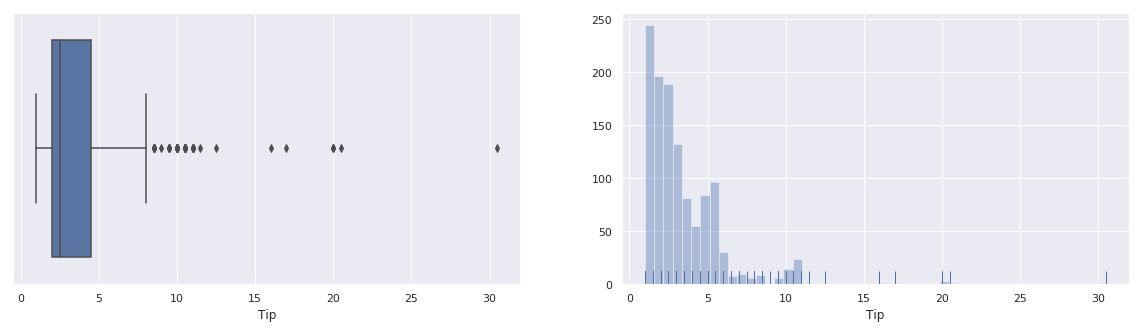

In [14]:
# Plot boxplot and histogram of df_tippers
plt.figure(figsize=(20,5))
# Indicate you want the boxplot on the left with the plt.subplot() routine
plt.subplot(1, 2, 1)
sns.boxplot(df_tip['Tip'])
# Indicate you want the histogram on the right
plt.subplot(1, 2, 2)
sns.distplot(df_tip['Tip'], 
             kde=False, 
             rug=True)
plt.show()

### Questions:
1. What fraction of riders tip?
2. Based on the plots above, what is the approximate IQR for tips when tips are given?
2. What's the difference between a "typical" tip and the maximum tip?

### Step 11: Print the summary statistics for tippers and non-tippers.
Run the next two cells below to perform this step



In [15]:
# Print summary statistics for df_tip
df_tip.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,1194.000000,1194.000000,1100.000000,1102.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1101.000000,1101.000000,1102.000000,1102.000000,1194.000000,1194.000000,1194.000000
mean,1039.672529,6.809966,23.879091,25.828494,13.320713,3.431742,3.496147,20.248602,1.137353,41.904971,-87.670339,41.906439,-87.677671,2018.206868,9.724456,13.531826
std,685.599449,7.457988,21.103172,22.302165,10.428552,2.519777,2.279448,13.517636,0.494288,0.055840,0.066554,0.055032,0.077357,0.405230,4.457525,6.437871
min,94.000000,0.000000,1.000000,1.000000,0.690460,1.000000,0.000000,5.240460,1.000000,41.683914,-87.915590,41.688364,-87.915528,2018.000000,1.000000,0.000000
25%,539.750000,1.900000,7.000000,8.000000,6.389078,2.000000,2.500000,11.730974,1.000000,41.881581,-87.681289,41.882136,-87.684695,2018.000000,12.000000,9.250000
50%,855.000000,3.800000,22.000000,22.000000,10.145995,2.500000,3.000000,15.926644,1.000000,41.900798,-87.654448,41.901336,-87.653568,2018.000000,12.000000,15.000000
75%,1379.500000,8.600000,32.000000,32.000000,15.798099,4.500000,3.500000,22.666812,1.000000,41.944675,-87.631289,41.943961,-87.631527,2018.000000,12.000000,19.000000
max,4696.000000,51.000000,77.000000,77.000000,89.506623,30.500000,15.300000,110.096623,5.000000,42.022373,-87.534506,42.019432,-87.534734,2019.000000,12.000000,23.000000


In [16]:
# Print summary statistics for df_notip
df_notip.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Year,Month,Hour of Day
count,5378.000000,5378.000000,5037.000000,4992.000000,5378.000000,5378.0,5378.000000,5378.000000,5378.000000,5042.000000,5042.000000,4996.000000,4996.000000,5378.000000,5378.000000,5378.000000
mean,972.433804,5.870844,25.339885,25.872596,11.129275,0.0,2.987800,14.117075,1.304574,41.889037,-87.665425,41.890238,-87.666821,2018.229267,9.478059,13.243213
std,654.941231,6.320770,20.020393,20.307449,8.475690,0.0,1.738651,9.346076,0.704552,0.064108,0.055853,0.063771,0.059471,0.420401,4.624407,6.645209
min,67.000000,0.000000,1.000000,1.000000,0.019438,0.0,0.000000,0.700983,1.000000,41.649067,-87.914964,41.649354,-87.915297,2018.000000,1.000000,0.000000
25%,498.250000,1.800000,8.000000,8.000000,5.825371,0.0,2.500000,8.470272,1.000000,41.871554,-87.684388,41.874718,-87.684671,2018.000000,12.000000,9.000000
50%,811.500000,3.700000,24.000000,24.000000,8.475491,0.0,3.000000,11.271955,1.000000,41.894189,-87.653325,41.893906,-87.652138,2018.000000,12.000000,14.000000
75%,1279.000000,7.300000,32.000000,32.000000,13.105275,0.0,3.050000,16.056676,1.000000,41.928889,-87.631479,41.929428,-87.631632,2018.000000,12.000000,19.000000
max,6472.000000,83.500000,77.000000,77.000000,121.016974,0.0,14.500000,123.816974,6.000000,42.020637,-87.534121,42.020109,-87.533848,2019.000000,12.000000,23.000000


### Questions:
1. What is the difference between the median fare for tippers vs. non-tippers?
2. Based on the summary statistics for tippers compared with non-tippers, are there any obvious differences that stand out between the two (apart from the fact that non-tippers don't tip!)?

### Step 12: Look at tips by day of the week and hour of day.
The next logical step when looking to identify insights in your data is to investigate subsets of the data. In this case, the summary statistics don't look much different for the entire data set, so we can start by looking at subsets grouped by day of the week and hour of the day.

Run the next cell to generate boxplots for tips given when grouped by day of the week and hour of day.

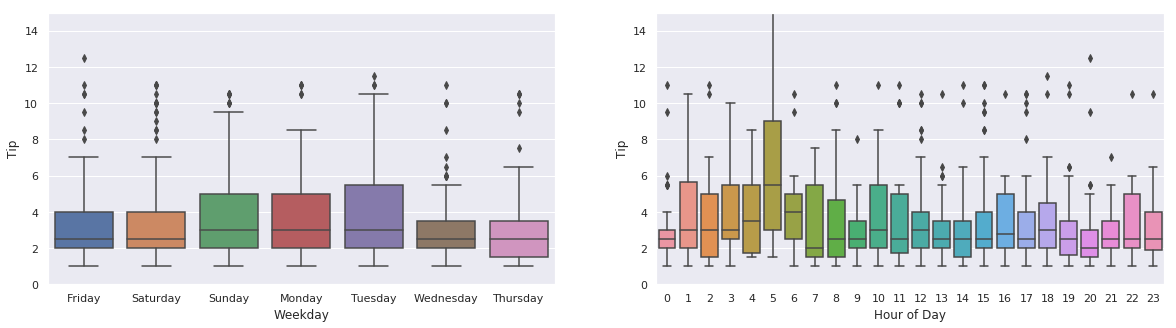

In [17]:
# Plot boxplot and histogram of df_tippers
plt.figure(figsize=(20,5))
# Indicate you want the weekday boxplot on the left with the plt.subplot() routine
plt.subplot(1, 2, 1)
sns.boxplot(x='Weekday', 
            y='Tip', 
            data=df_tip)
plt.ylim(0, 15)
# Indicate you want the weekday boxplot on the left with the plt.subplot() routine
plt.subplot(1, 2, 2)
sns.boxplot(x='Hour of Day', 
            y='Tip', 
            data=df_tip)
plt.ylim(0, 15)
plt.show()

The graphs you created above show multiple boxplots at once. Now the boxplots are oriented vertically instead of horizontally, but the information they show is the same thing, namely, the 5-number summary of tips grouped by day of the week on the left and hour of the day on the right (note: the hour starts at 0 for midnight up to 23 for 11PM).


### Questions and Exercise:
1. Based on the plots above, does it look like there is any difference in tips between different days of the week or hours of the day? 
2. Which hour of the day has the highest median tip?

Change the code above to plot the "Fare" column instead of "Tip". To do this:
- Change "Tip" to "Fare" in the two places it occurs.
- Change the line "`plt.ylim(0, 15)`"   to   "`plt.ylim(0, 50)`" in the two places it occurs.

3. Do you see any similarities between the boxplots you created for "Tip" and those for "Fare"?

***Bonus Exercise***: The colors shown in the plots above are not adding any information. For some crazy reason they are just the defaults for the `sns.boxplot()` routine in this case. Visual design best practices would suggest you should change to a single color for these plots. You can do so by simply changing the following lines in the code cell above:
```python
sns.boxplot(x='Weekday', 
            y="Tip", 
            data=df_tip)
sns.boxplot(x='Hour of Day', 
            y="Tip", 
            data=df_tip)
```
and setting the color to pale blue by adding `color='b'` like this:
```python
sns.boxplot(x='Weekday',
            y='Tip', 
            data=df_tip, 
            color='b')
sns.boxplot(x='Hour of Day', 
            y='Tip', 
            data=df_tip, 
            color='b')
```
Try it and see what you get!

You can also try switching to `color='g'`  for green, `'r'` for red, and so on.

***Note: Throughout the rest of this notebook, colors for plotting have been chosen at random. Feel free to change them!***

## Step 13: Compute fraction of people who tip by day of week and hour of day

Run the cell below to compute the fraction of people who tip each day of the week.

In [18]:
# Print out the fraction of tippers by day of the week
# Note: the days print out in a strange order because the list is arranged alphabetically
print('Fraction of tippers by day of week:\n', round(df_tip.groupby(['Weekday']).count()['Tip']/df.groupby(['Weekday']).count()['Tip'], 2))

Fraction of tippers by day of week:
 Weekday
Friday       0.18
Monday       0.19
Saturday     0.18
Sunday       0.19
Thursday     0.18
Tuesday      0.18
Wednesday    0.17
Name: Tip, dtype: float64


Run the next cell to compute the fraction of people who tip at each hour of the day.

In [19]:
# Print out the fraction of tippers by hour of day
# Note: the hour starts at 0 for midnight up to 23 for 11PM.
print('Fraction of tippers by hour of day:\n', round(df_tip.groupby(["Hour of Day"]).count()["Tip"]/df.groupby(["Hour of Day"]).count()["Tip"], 2))

Fraction of tippers by hour of day:
 Hour of Day
0     0.17
1     0.16
2     0.17
3     0.17
4     0.11
5     0.22
6     0.18
7     0.16
8     0.17
9     0.14
10    0.22
11    0.17
12    0.18
13    0.20
14    0.18
15    0.22
16    0.14
17    0.21
18    0.21
19    0.19
20    0.17
21    0.18
22    0.18
23    0.17
Name: Tip, dtype: float64


### Question:

1. Is any one day of the week or hour of the day bettter than another in terms of fraction of people who tip?

## Step 14: Create scatter plots of Fare vs. Tip.

In the previous steps, you may have noticed that both tips and fares seemed a bit higher for some reason in the early AM hours. Next you'll plot these two columns against each other in a scatter plot to see if they appear to be related.

Run the cell below to create a scatter plot of Fare vs. Tip for all riders who tipped using the [seaborn scattertplot() routine](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

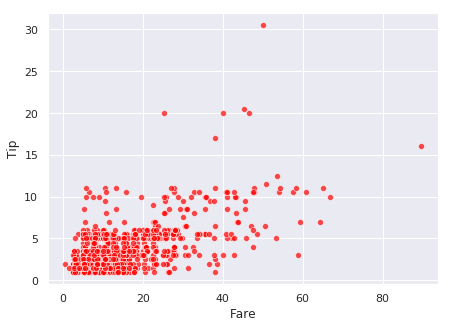

In [20]:
# Plot a scatterplot of fare vs tip
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_tip,
                x = 'Fare', 
                y = 'Tip',
                alpha = 0.7,
                edgecolors='w',
                color='red')
plt.show()

### Question: 
1. Does it look to you like there is a relationship between Fare and Tip? Or in other words, do riders paying a high fare tend to tip more?

### Step 15: Investigate Tip with regards to pickup location
Your data set includes location data for the pickup and dropoff location of each ride, listed in the fields "Pickup Centroid Latitude", "Pickup Centroid Longitude" "Dropoff Centroid Latitude", and "Dropoff Centroid Longitude". Run the cell below to plot the geographical pickup location of rides that tipped and those that didn't. 

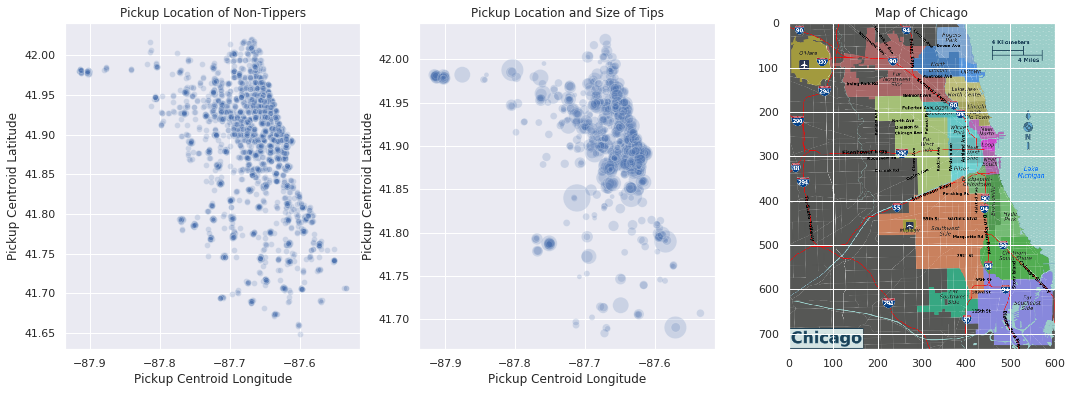

In [21]:
# Plot pickup location for tippers and non-tippers
plt.figure(figsize=(18,6))

# Indicate you want the boxplot on the left with the plt.subplot() routine
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Pickup Centroid Longitude', 
                y = 'Pickup Centroid Latitude', 
                data = df_notip,
                alpha=0.2, 
                edgecolors='w')
plt.title('Pickup Location of Non-Tippers')

# Indicate you want the boxplot on the left with the plt.subplot() routine
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'Pickup Centroid Longitude', 
                y = 'Pickup Centroid Latitude', 
                data = df_tip,
                s = df_tip['Tip']*25, # Use the s parameter to set the size of data points to tip size!
                alpha=0.2, 
                edgecolors='w')
plt.title('Pickup Location and Size of Tips')

# Read in a map image of Chicago and display next to the plots
plt.subplot(1, 3, 3)
img = mpimg.imread('Data-C4/600px-Integrated_Chicago_districts_map.png')
plt.imshow(img)
plt.title('Map of Chicago')
plt.show()

Compare the plots above with the image on the right... can you make out the city of Chicago in the distribution of points above?



### Questions
1. Do you notice any differences about the geographical distribution of pickup location for riders who tip vs. those who don't?

2. There appear to be two concentrations of riders who tip from pickup locations that are fairly far out west (left) of the city. Looking at the figure below and the larger map (scroll down to see), can you guess which locations these are?
<img src="https://pathstream-data-analytics.s3-us-west-2.amazonaws.com/tips_west_of_chicago.png" width = "300" />


Check out the website this map came from to learn more about the neighborhoods of Chicago and think about how location might factor in to rideshare usage: https://wikitravel.org/en/Chicago

<img src="https://wikitravel.org/upload/shared//thumb/1/1f/Integrated_Chicago_districts_map.png/600px-Integrated_Chicago_districts_map.png" width = 600 alt="Drawing" style="width: 100px;"/>

## Part 3: Investigating Time Series
One of the most important factors impacting driver income is demand for rides. In this part of the project, you'll look into the total number of rides per hour or per day over a given time period, as well as the average number of rides per hour for a range of days and average number of rides per day over a range of weeks.

*Note: keep in mind that the data you're working with has been downsampled by a factor of 500, meaning the original data set for this two week period contains 500 times as many records! Thus, when the analysis you do below results in a number like "500 rides per day" or "10 rides per hour" for example, this actually represents approximately 250,000 rides per day or 5000 rides per hour in the original data!*

### Step 16: Plot a time series of rides per day
Run the code in the following cell to use the pandas built-in [DataFrame.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) routine to count up the number of rides per day based on the "Trip Start Timestamp" column. 

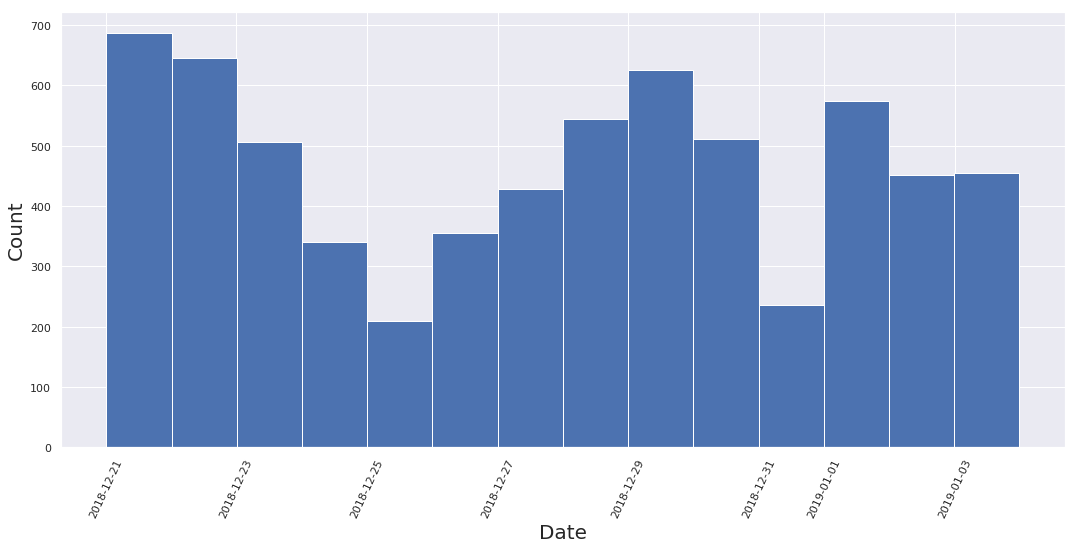

In [22]:
# Define the date range you want to sample
# Set the start date/time as the first timestamp in the dataframe
start_timestamp = df["Trip Start Timestamp"][0]
# Set the end date/time as the last timestamp in the dataframe
end_timestamp = df["Trip Start Timestamp"].iloc[-1]
# Isolate a dataframe including only data from the start date to end date
df2 = df[(df['Trip Start Timestamp'] >= start_timestamp) & (df['Trip Start Timestamp'] <= end_timestamp)]

# Calculate the time difference in seconds between start and end date
time_delta = end_timestamp - start_timestamp
# Convert the time difference in seconds to days
total_days = round(time_delta.total_seconds()/(3600*24))

# Plot a histogram from start to end timestamp binned by day
plt.figure(figsize=(18,8))
plt.hist(df2['Trip Start Timestamp'], bins=total_days)
plt.xticks(rotation=65)  # Rotate the x tick labels for readability
plt.ylabel('Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.show()


### Questions:
1. Which dates have the lowest number of total rides?

### Step 17: Plot a time series of rides per hour
Run the code in the following cell to count up the number of rides per hour based on the "Trip Start Timestamp" column.

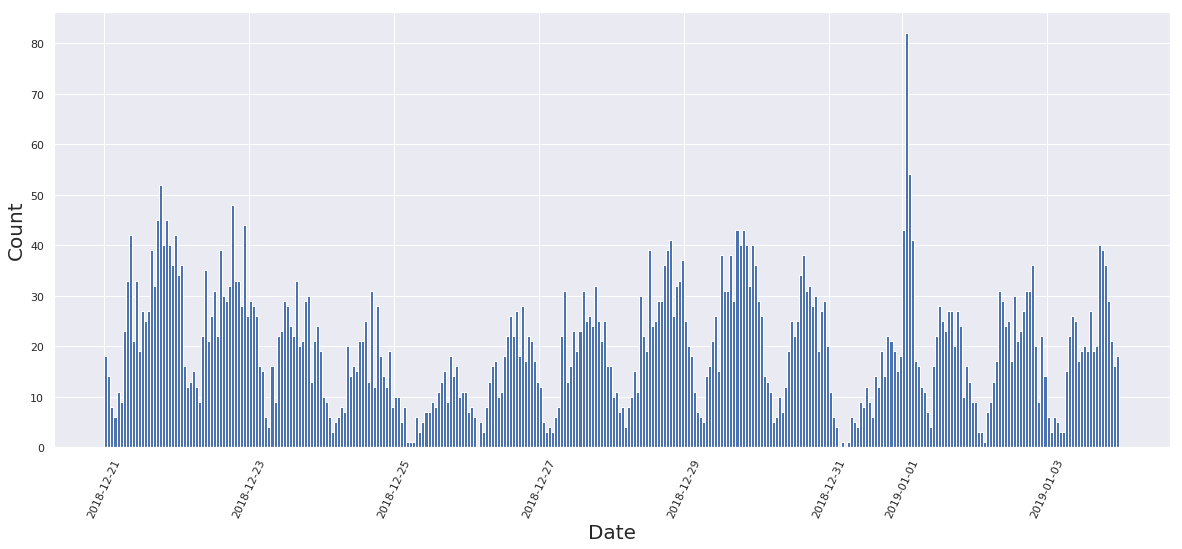

In [23]:
# Define the date range you want to sample
# Set the start date/time as the first timestamp in the dataframe
start_timestamp = df["Trip Start Timestamp"][0]
# Set the end date/time as the last timestamp in the dataframe
end_timestamp = df["Trip Start Timestamp"].iloc[-1]
# Isolate a dataframe including only data from the start date to end date
df2 = df[(df['Trip Start Timestamp'] >= start_timestamp) & (df['Trip Start Timestamp'] <= end_timestamp)]

# Calculate the time difference in seconds between start and end date
time_delta = end_timestamp - start_timestamp
# Convert the time difference from seconds to hours
total_hours = round(time_delta.total_seconds()/3600)

# Plot a histogram from start to end date binned by hour
plt.figure(figsize=(20,8))
# Generate a histogram with df.hist(). Note: this hourly histogram gets crowded if you plot more than two weeks or so of data
df2['Trip Start Timestamp'].hist(bins=total_hours)
plt.xticks(rotation=65) # Rotate the x tick labels for readability
plt.ylabel('Count', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.show()

The plot you generated above is a histogram of rides per hour, where each little spike corresponds to 1 hour of time and the height of the spike is the number of rides that happened in that hour.

### Questions & Exercise:
1. What patterns do you see emerging in this plot?

Zoom in on the large peak by changing the start and end date in the code cell above like this:
```
start_date = pd.Timestamp(2018, 12, 31, 0)
end_date = pd.Timestamp(2019, 1, 2, 0)
```
2. What date and time of day did this peak occur?

Experiment with changing the `start_date`  and `end_date` to further investigate other details of this time series of rides per hour!

### Step 18: Calculate the average number of rides at each hour of the day over the entire dataset.
*Note: keep in mind that the downsampling by a factor of 500 in the original selection of data means that, for example, a count of 20 rides per hour implies 10,000 rides per hour in the full dataset!*

Run the cell below to use the [seaborn barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html) routine to perform this step.

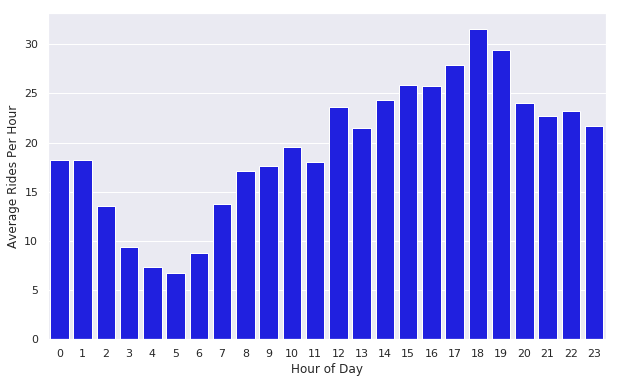

In [24]:
# Create a figure to display total rides as a function of time of day
plt.figure(figsize=(10, 6))
sns.barplot(x="Hour of Day", y="Hour of Day", data=df, estimator=lambda x: len(x)/14, color='blue')
plt.ylabel("Average Rides Per Hour")
plt.show()

### Questions
1. What time of day shows the lowest demand for rides?
2. What time of day shows the highest demand for rides?
3. What do you think might be responsible for the shape of this plot overall?

### Step 19: Compute total rides for each day of the week

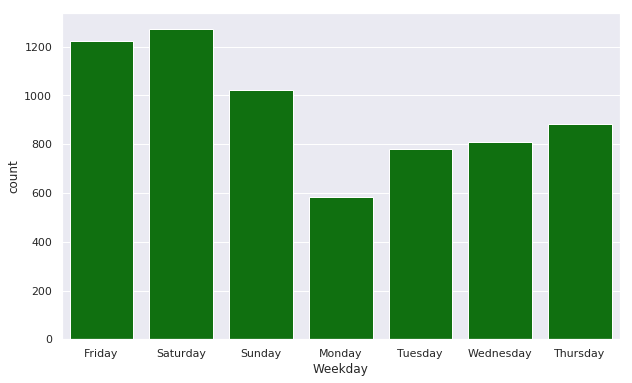

In [25]:
# Create a figure to display total rides as a function of time of day
plt.figure(figsize=(10, 6))
# Use countplot() again, this time in a new color!
sns.countplot(df['Weekday'], 
              color='green')
plt.show()


### Questions
1. What day of the week shows the lowest demand for rides?
2. What day of the week shows the highest demand for rides?
3. What do you think might be responsible for these trends?

# Congratulations! You've come to the end of this notebook!

Great job carrying out this exploratory analysis of the Chicago rideshare dataset. You now have a wealth of insights to present regarding the statistics of rides in Chicago and key metrics that affect drivers. Write up your results along with any supporting figures you would like to use from this notebook or your work in Google sheets. 